# Automobile Accidents

In [2]:
# imports
import scipy as sc

import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
weatherPd = pd.read_csv("Data/salt+lake+city.csv")
weather2019 = weatherPd[(weatherPd['date_time'] > '2018-12-31') & (weatherPd['date_time'] < '2020-01-01')]
weather2019

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
1096,2019-01-01,-6,-11,0.0,8.7,1,1,26,03:38 AM,02:22 PM,...,-13,15,5,71,0.0,1035,-6,10,190,7
1097,2019-01-02,-5,-13,0.0,8.7,1,1,19,04:40 AM,02:58 PM,...,-12,11,5,71,0.0,1039,-5,10,173,6
1098,2019-01-03,-2,-11,0.0,8.7,1,1,11,05:41 AM,03:37 PM,...,-8,12,6,74,0.0,1032,-2,10,168,6
1099,2019-01-04,0,-9,0.0,8.7,1,1,4,06:38 AM,04:21 PM,...,-6,12,9,79,0.0,1024,0,10,168,5
1100,2019-01-05,2,-9,0.0,8.7,1,1,0,07:31 AM,05:10 PM,...,-5,23,20,79,0.1,1019,2,10,126,7
1101,2019-01-06,3,1,4.9,3.6,1,1,0,08:19 AM,06:02 PM,...,-2,19,74,73,5.8,1014,3,6,194,12
1102,2019-01-07,4,1,1.3,5.3,1,1,3,09:01 AM,06:57 PM,...,-1,24,63,74,1.5,1019,4,8,226,19
1103,2019-01-08,6,0,0.0,8.7,1,1,10,09:39 AM,07:54 PM,...,0,15,24,73,0.0,1026,6,10,102,9
1104,2019-01-09,4,0,0.0,8.7,1,1,18,10:12 AM,08:51 PM,...,-2,23,16,72,0.0,1022,4,10,125,11
1105,2019-01-10,1,-3,0.1,5.3,1,1,25,10:41 AM,09:49 PM,...,-2,11,44,88,0.5,1023,1,10,238,5


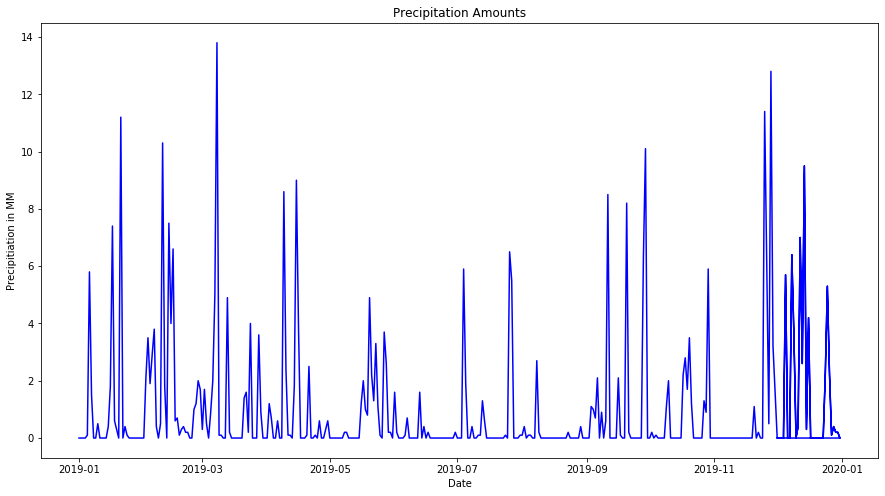

In [4]:
plt.figure(figsize=(15,8))
plt.plot(pd.to_datetime(weather2019['date_time']).dt.date,weather2019["precipMM"],color='blue')
plt.xlabel('Date')
plt.ylabel('Precipitiation in MM')
plt.title('Precipitation Amounts')
plt.show()

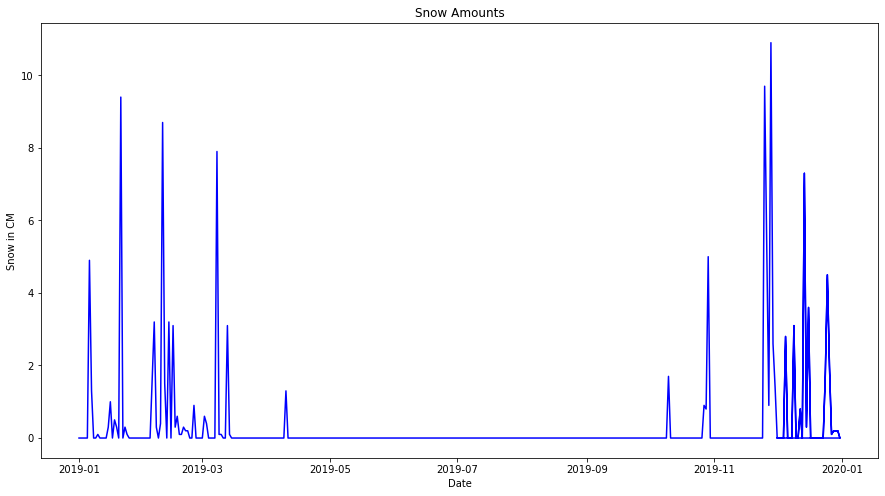

In [5]:
plt.figure(figsize=(15,8))
plt.plot(pd.to_datetime(weather2019['date_time']).dt.date,weather2019["totalSnow_cm"],color='blue')
plt.xlabel('Date')
plt.ylabel('Snow in CM')
plt.title('Snow Amounts')
plt.show()

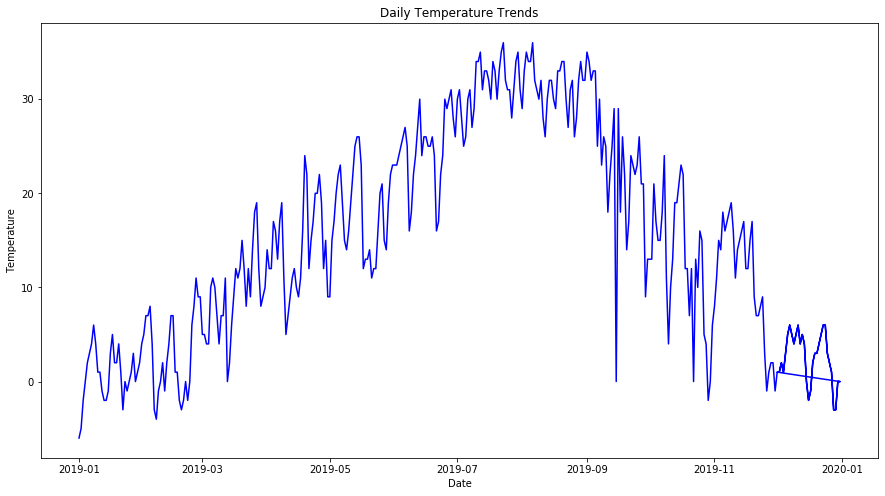

In [6]:
plt.figure(figsize=(15,8))
plt.plot(pd.to_datetime(weather2019['date_time']).dt.date,weather2019["tempC"],color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Temperature Trends')
plt.show()

In [7]:
accidentPd = pd.read_csv("Data/DDACTS_download.csv")
saltLakeAccidents = accidentPd.loc[accidentPd["COUNTY_NAME"] == "SALT LAKE"]
slAccidentsDaily = pd.DataFrame({'accidentCount': saltLakeAccidents.groupby(pd.to_datetime(saltLakeAccidents["CRASH_DATETIME"]).dt.date).size()})
slAccidentsDaily.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accidentCount
CRASH_DATETIME,
2019-01-01,25
2019-01-02,69
2019-01-03,88
2019-01-04,88
2019-01-05,66


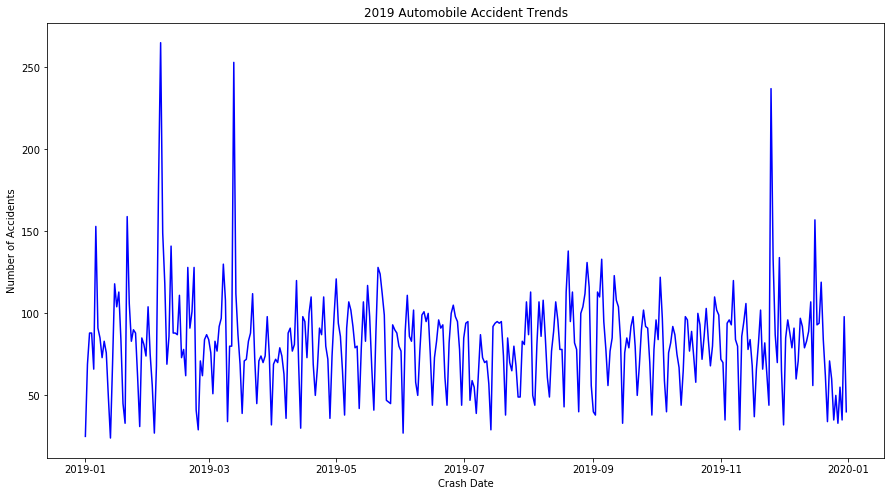

In [8]:
plt.figure(figsize=(15,8))
plt.plot(slAccidentsDaily,color='blue')
plt.xlabel('Crash Date')
plt.ylabel('Number of Accidents')
plt.title('2019 Automobile Accident Trends')
plt.show()

In [9]:
weather2019.insert(2,'date',pd.to_datetime(weather2019['date_time']).dt.date,True)
weather2019.drop_duplicates(subset ="date", 
                     keep = 'first', inplace = True)
mergedData = pd.merge(weather2019, slAccidentsDaily, left_on="date", right_on="CRASH_DATETIME", how='left')
mergedDataClean = mergedData.drop(['uvIndex', 'uvIndex.1'], axis=1)
mergedDataClean

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date_time,maxtempC,date,mintempC,totalSnow_cm,sunHour,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,accidentCount
0,2019-01-01,-6,2019-01-01,-11,0.0,8.7,26,03:38 AM,02:22 PM,07:52 AM,...,15,5,71,0.0,1035,-6,10,190,7,25
1,2019-01-02,-5,2019-01-02,-13,0.0,8.7,19,04:40 AM,02:58 PM,07:52 AM,...,11,5,71,0.0,1039,-5,10,173,6,69
2,2019-01-03,-2,2019-01-03,-11,0.0,8.7,11,05:41 AM,03:37 PM,07:52 AM,...,12,6,74,0.0,1032,-2,10,168,6,88
3,2019-01-04,0,2019-01-04,-9,0.0,8.7,4,06:38 AM,04:21 PM,07:52 AM,...,12,9,79,0.0,1024,0,10,168,5,88
4,2019-01-05,2,2019-01-05,-9,0.0,8.7,0,07:31 AM,05:10 PM,07:52 AM,...,23,20,79,0.1,1019,2,10,126,7,66
5,2019-01-06,3,2019-01-06,1,4.9,3.6,0,08:19 AM,06:02 PM,07:52 AM,...,19,74,73,5.8,1014,3,6,194,12,153
6,2019-01-07,4,2019-01-07,1,1.3,5.3,3,09:01 AM,06:57 PM,07:52 AM,...,24,63,74,1.5,1019,4,8,226,19,91
7,2019-01-08,6,2019-01-08,0,0.0,8.7,10,09:39 AM,07:54 PM,07:52 AM,...,15,24,73,0.0,1026,6,10,102,9,85
8,2019-01-09,4,2019-01-09,0,0.0,8.7,18,10:12 AM,08:51 PM,07:52 AM,...,23,16,72,0.0,1022,4,10,125,11,73
9,2019-01-10,1,2019-01-10,-3,0.1,5.3,25,10:41 AM,09:49 PM,07:51 AM,...,11,44,88,0.5,1023,1,10,238,5,83


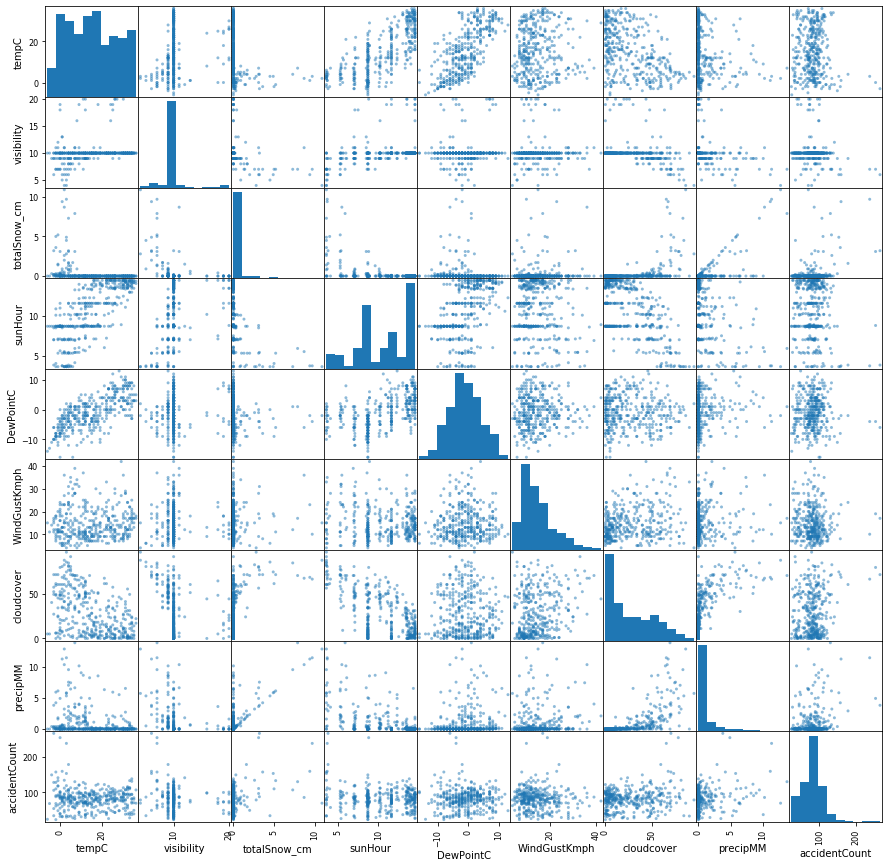

In [10]:
pd.plotting.scatter_matrix(mergedDataClean[['tempC', 'visibility', 'totalSnow_cm', 'sunHour', 'DewPointC', 'WindGustKmph', 'cloudcover', 'precipMM','accidentCount']], figsize=(15,15))
print()

In [11]:
mergedDataClean.corr()

,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,accidentCount
maxtempC,1.000000,0.960627,-0.286041,0.751537,0.048262,0.707617,0.980352,0.979399,0.981011,0.048534,-0.476925,-0.830584,-0.241737,-0.459110,1.000000,0.190052,0.330387,0.069389,-0.067569
mintempC,0.960627,1.000000,-0.248658,0.695989,0.055589,0.775225,0.975413,0.978338,0.975675,0.082574,-0.369676,-0.766075,-0.166702,-0.523363,0.960627,0.157366,0.340871,0.119528,-0.047265
totalSnow_cm,-0.286041,-0.248658,1.000000,-0.436918,-0.095327,-0.107761,-0.276030,-0.264258,-0.275263,0.074337,0.446529,0.357298,0.717381,-0.081061,-0.286041,-0.332366,-0.010008,0.083686,0.344358
sunHour,0.751537,0.695989,-0.436918,1.000000,0.042157,0.514451,0.739408,0.736469,0.739443,-0.109004,-0.642987,-0.674778,-0.462768,-0.253462,0.751537,0.324994,0.356507,-0.048661,-0.128861
moon_illumination,0.048262,0.055589,-0.095327,0.042157,1.000000,-0.015528,0.054416,0.052922,0.052630,-0.036038,-0.038597,-0.091550,-0.040541,0.061643,0.048262,0.207216,0.027646,-0.081054,0.008895
DewPointC,0.707617,0.775225,-0.107761,0.514451,-0.015528,1.000000,0.760182,0.766961,0.755250,0.034500,-0.026428,-0.265059,0.117555,-0.572534,0.707617,0.091311,0.297785,0.094900,-0.007510
FeelsLikeC,0.980352,0.975413,-0.276030,0.739408,0.054416,0.760182,1.000000,0.996673,0.999602,0.042472,-0.441546,-0.805857,-0.206220,-0.500987,0.980352,0.175296,0.336709,0.067404,-0.066806
HeatIndexC,0.979399,0.978338,-0.264258,0.736469,0.052922,0.766961,0.996673,1.000000,0.996416,0.089738,-0.418677,-0.802958,-0.191032,-0.520974,0.979399,0.177456,0.324696,0.121308,-0.060293
WindChillC,0.981011,0.975675,-0.275263,0.739443,0.052630,0.755250,0.999602,0.996416,1.000000,0.044170,-0.443390,-0.808249,-0.207565,-0.500657,0.981011,0.171994,0.335824,0.068975,-0.066611
WindGustKmph,0.048534,0.082574,0.074337,-0.109004,-0.036038,0.034500,0.042472,0.089738,0.044170,1.000000,0.239285,-0.093821,0.144571,-0.285031,0.048534,-0.001914,-0.318100,0.902590,-0.052453


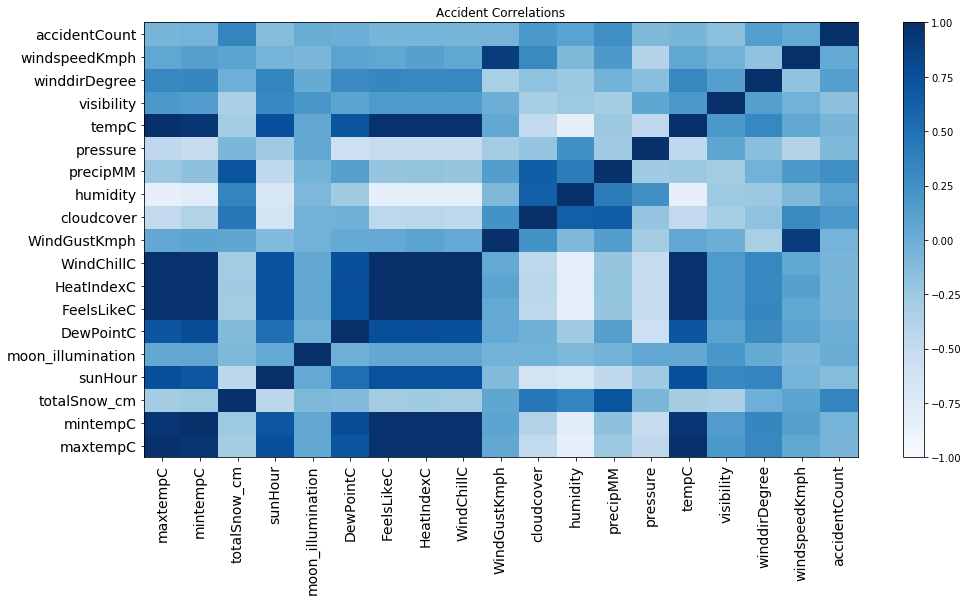

In [99]:
plt.figure(figsize=(16,8))
heatmap = plt.pcolor(mergedDataClean.corr(), cmap=plt.cm.Blues, vmin=-1, vmax=1)
plt.colorbar(heatmap)
plt.xticks(np.arange(0, 19)+0.5, mergedDataClean.corr().columns, fontsize=14, rotation=90)
plt.yticks(np.arange(0, 19)+0.5, mergedDataClean.corr().columns, fontsize=14)
plt.title('Accident Correlations')
plt.show()

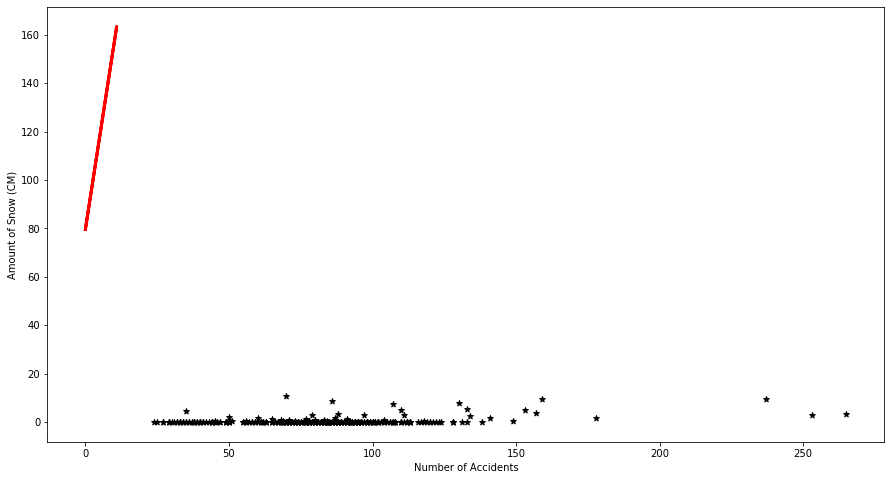

In [100]:
snowOls = sm.ols(formula="accidentCount ~ totalSnow_cm", data=mergedDataClean).fit()
plt.figure(figsize=(15,8))
plt.scatter(x=mergedDataClean.accidentCount,y=mergedDataClean.totalSnow_cm,c='k',marker='*',label='Number of Accidents')
plt.plot(mergedDataClean.totalSnow_cm,snowOls.predict(),'k',color='red',linewidth=3)

plt.xlabel('Number of Accidents')
plt.ylabel('Amount of Snow (CM)')
plt.show()

In [114]:
newOls = sm.ols(formula="accidentCount ~ totalSnow_cm*precipMM", data=mergedDataClean).fit()
newOls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          accidentCount   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     20.19
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           4.08e-12
Time:                        17:54:06   Log-Likelihood:                -1728.7
No. Observations:                 365   AIC:                             3465.
Df Residuals:                     361   BIC:                             3481.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                78.3806      1.631     48.068      0.000      75.174      81.587
totalSnow_cm             17.2991      3.473      4.981      0.000      10.469      24.129
precipMM                  0.5527      0.941      0.587      0.557      -1.298       2.403
totalSnow_cm:precipMM    -1.0425      0.323     -3.231      0.001      -1.677      -0.408
==============================================================================
Omnibus:                       46.553   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.915
Skew:                           0.500   Prob(JB):                     9.38e-37
Kurtosis:                       6.148   Cond. No.                         34.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""